In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")

# Ver tamaño del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


# Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


Filas: 737453, Columnas: 24


In [2]:
print(df.head())

print("\n Columnas del dataset:")
print(df.columns.tolist())

print("\n Tipos de datos por columna:")
print(df.dtypes)

print("\n Valores nulos por columna:")
print(df.isnull().sum())

print(f"\n Filas duplicadas: {df.duplicated().sum()}")


                  date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
0  2017-03-10 01:00:00        55,2         16,98     3019,53    557,434   
1  2017-03-10 01:00:00        55,2         16,98     3024,41    563,965   
2  2017-03-10 01:00:00        55,2         16,98     3043,46    568,054   
3  2017-03-10 01:00:00        55,2         16,98     3047,36    568,665   
4  2017-03-10 01:00:00        55,2         16,98     3033,69    558,167   

  Ore Pulp Flow Ore Pulp pH Ore Pulp Density Flotation Column 01 Air Flow  \
0       395,713     10,0664             1,74                      249,214   
1       397,383     10,0672             1,74                      249,719   
2       399,668      10,068             1,74                      249,741   
3       397,939     10,0689             1,74                      249,917   
4       400,254     10,0697             1,74                      250,203   

  Flotation Column 02 Air Flow  ... Flotation Column 07 Air Flow  \
0                 

In [3]:
df = df.drop_duplicates()
print(f"Filas después de eliminar duplicados: {df.shape[0]}")


Filas después de eliminar duplicados: 736282


In [4]:
for col in df.columns:
    if col != 'date':
        df[col] = df[col].str.replace(',', '.', regex=False).astype(float)


In [5]:
df['date'] = pd.to_datetime(df['date'])


In [6]:
print(df.dtypes)          # Tipos de datos correctos
print(df.isnull().sum())  # Asegúrate de que no aparecieron NaN tras conversiones


date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

In [7]:
print("\n Estadísticas básicas:")
print(df.describe())



 Estadísticas básicas:
                                date    % Iron Feed  % Silica Feed  \
count                         736282  736282.000000  736282.000000   
mean   2017-06-16 02:30:44.009767936      56.298307      14.648984   
min              2017-03-10 01:00:00      42.740000       1.310000   
25%              2017-05-04 21:00:00      52.670000       8.940000   
50%              2017-06-16 12:00:00      56.080000      13.850000   
75%              2017-07-29 09:00:00      59.720000      19.600000   
max              2017-09-09 23:00:00      65.780000      33.400000   
std                              NaN       5.160365       6.810741   

         Starch Flow     Amina Flow  Ore Pulp Flow    Ore Pulp pH  \
count  736282.000000  736282.000000  736282.000000  736282.000000   
mean     2869.636615     488.165523     397.570736       9.767315   
min         0.002026     241.669000     376.249000       8.753340   
25%      2075.070000     431.835848     394.248000       9.527050   


In [ ]:
for col in df.columns:
    if col != 'date':
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')


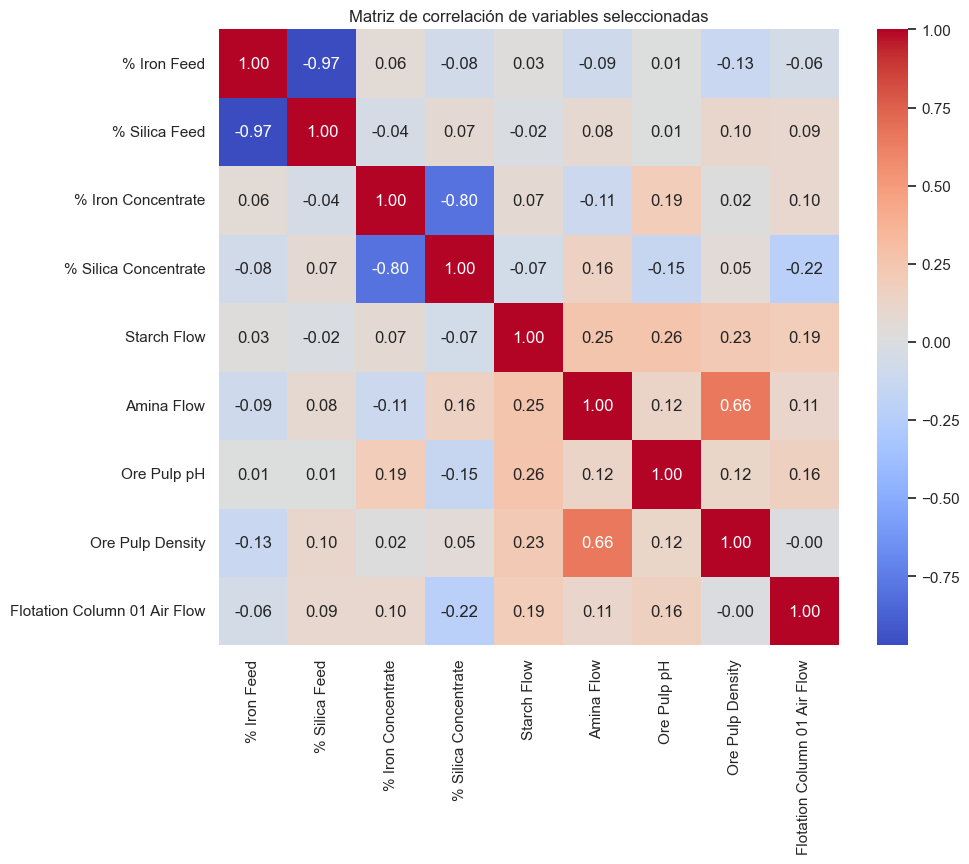


 Correlación de otras variables con % Iron Concentrate:
 - % Silica Concentrate: -0.80 (alta correlación, negativa)
 - Ore Pulp pH: 0.19 (correlación muy débil o nula, positiva)
 - Amina Flow: -0.11 (correlación muy débil o nula, negativa)
 - Flotation Column 01 Air Flow: 0.10 (correlación muy débil o nula, positiva)
 - Starch Flow: 0.07 (correlación muy débil o nula, positiva)
 - % Iron Feed: 0.06 (correlación muy débil o nula, positiva)
 - % Silica Feed: -0.04 (correlación muy débil o nula, negativa)
 - Ore Pulp Density: 0.02 (correlación muy débil o nula, positiva)

 Correlación de otras variables con % Silica Concentrate:
 - % Iron Concentrate: -0.80 (alta correlación, negativa)
 - Flotation Column 01 Air Flow: -0.22 (correlación baja, negativa)
 - Amina Flow: 0.16 (correlación muy débil o nula, positiva)
 - Ore Pulp pH: -0.15 (correlación muy débil o nula, negativa)
 - % Iron Feed: -0.08 (correlación muy débil o nula, negativa)
 - % Silica Feed: 0.07 (correlación muy débil o nula

In [11]:


# VARIABLES 
cols_interes = [
    '% Iron Feed', '% Silica Feed', 
    '% Iron Concentrate', '% Silica Concentrate',
    'Starch Flow', 'Amina Flow', 'Ore Pulp pH',
    'Ore Pulp Density', 'Flotation Column 01 Air Flow'
]

#  matriz de correlación
corr_matrix = df[cols_interes].corr()

#  heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación de variables seleccionadas")
plt.show()

#  texto para % Iron Concentrate y % Silica Concentrate
targets = ['% Iron Concentrate', '% Silica Concentrate']

for target in targets:
    print(f"\n Correlación de otras variables con {target}:")
    
    # correlación, excluyendo la diagonal (1.0)
    corr_target = corr_matrix[target].drop(target).sort_values(key=abs, ascending=False)

    for var, corr_value in corr_target.items():
        if abs(corr_value) >= 0.7:
            interpret = "alta correlación"
        elif abs(corr_value) >= 0.4:
            interpret = "correlación moderada"
        elif abs(corr_value) >= 0.2:
            interpret = "correlación baja"
        else:
            interpret = "correlación muy débil o nula"

        direction = "positiva" if corr_value > 0 else "negativa"
        print(f" - {var}: {corr_value:.2f} ({interpret}, {direction})")




 Interpretación de Correlaciones | Correlation Interpretation
 Variable objetivo: % Iron Concentrate

(Objective Variable: % Iron Concentrate)

 Español:

La única correlación significativa es con:

% Silica Concentrate: -0.80 (alta, negativa)
Esto indica que a mayor cantidad de sílice en el concentrado, menor será el contenido de hierro. Es un comportamiento esperado: ambos compuestos compiten en el producto final, por lo que un aumento en uno reduce al otro.

Todas las demás variables presentan correlaciones muy débiles o nulas, lo cual sugiere que:

Parámetros de operación como pH, flujo de aire y flujos de reactivos (Starch, Amina) no tienen una influencia lineal directa sobre la cantidad de hierro en el concentrado.

% Iron Feed, sorprendentemente, muestra una correlación baja (0.06) con la cantidad de hierro recuperado, lo que podría deberse a factores no capturados en los datos o a control automático del proceso.

 English:

The only strong correlation is with:

% Silica Concentrate: -0.80 (high, negative)
This suggests that the higher the silica content in the concentrate, the lower the iron content. This is expected behavior: silica and iron compete in the final product, so increasing one reduces the other.

All other variables show very weak or no linear correlation, suggesting that:

Operational parameters like pH, air flow, and reagent flows (Starch, Amina) don't have a direct linear influence on iron concentration.

% Iron Feed surprisingly shows low correlation (0.06) with the output iron, which could be due to unrecorded influencing factors or tight process control.

 Variable objetivo: % Silica Concentrate

(Objective Variable: % Silica Concentrate)

 Español:

Además de la correlación negativa fuerte con el hierro, se destaca:

Flotation Column 01 Air Flow: -0.22 (baja, negativa)
Un mayor flujo de aire parece estar asociado con una ligera disminución de sílice en el concentrado. Esto podría deberse a una mejor separación durante la flotación.

Las demás variables muestran correlaciones débiles o nulas, indicando nuevamente que no hay una relación lineal fuerte entre los parámetros de operación y la calidad del concentrado.

 English:

Beyond the strong negative correlation with iron, we observe:

Flotation Column 01 Air Flow: -0.22 (low, negative)
Higher airflow appears to be slightly associated with reduced silica content in the concentrate. This might suggest improved separation in the flotation process.

Other variables also show weak or no correlation, again indicating that operational parameters don't strongly influence concentrate quality in a linear way.

 Conclusiones | Conclusions
🇪🇸 Español:

Existe una fuerte relación inversa entre el hierro y la sílice en el concentrado final.

Las demás variables del proceso no tienen correlaciones lineales fuertes, lo que sugiere:

Relaciones no lineales

Variables faltantes en los datos

Alta estabilidad del proceso (control automático)

Esto justifica el uso de modelos de aprendizaje automático no lineales para explorar patrones ocultos.

🇬🇧 English:

There is a strong inverse relationship between iron and silica in the final concentrate.

Other process variables lack strong linear correlations, suggesting:

Nonlinear relationships

Missing influential variables

Stable, automated process control

This supports the idea of using nonlinear machine learning models to uncover hidden patterns

In [ ]:


# --- PREPARACIÓN DE DATOS / DATA PREPARATION ---
# Definir variables predictoras (features) y variable objetivo (target)
features = [
    '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
    'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow'
]

target = '% Iron Concentrate'

# Crear dataset con features y target, eliminando filas con NaN
data = df[features + [target]].dropna()

X = data[features]
y = data[target]

# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- ENTRENAMIENTO DEL MODELO / MODEL TRAINING ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- EVALUACIÓN DEL MODELO / MODEL EVALUATION ---
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) / Error cuadrático medio: {mse:.4f}")
print(f"R^2 Score / Coeficiente de determinación: {r2:.4f}")

# --- IMPORTANCIA DE VARIABLES / FEATURE IMPORTANCE ---
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances / Importancia de variables:")
print(feature_importance_df)

# Puedes añadir gráficas para visualización si quieres


plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.show()


Mean Squared Error (MSE) / Error cuadrático medio: 0.2328
R^2 Score / Coeficiente de determinación: 0.8105

Feature Importances / Importancia de variables:
                        Feature  Importance
1                 % Silica Feed    0.199080
4                   Ore Pulp pH    0.173114
0                   % Iron Feed    0.165272
5              Ore Pulp Density    0.141167
3                    Amina Flow    0.132637
2                   Starch Flow    0.102854
6  Flotation Column 01 Air Flow    0.085876


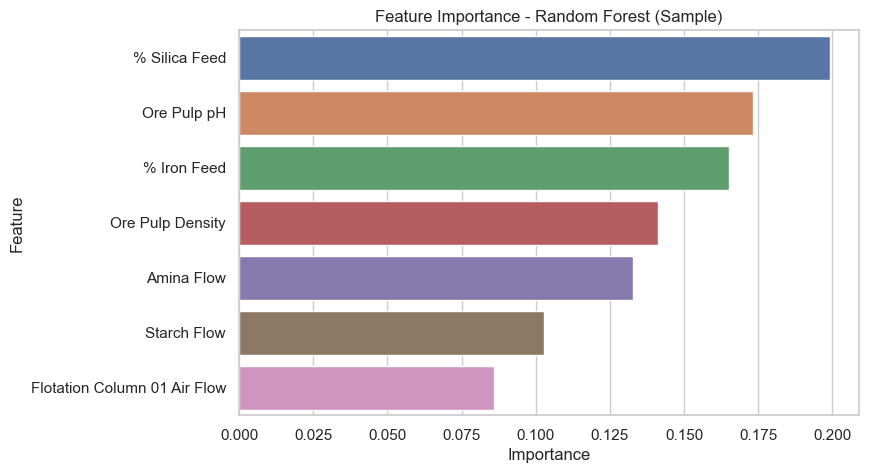

In [13]:


# --- PREPARACIÓN DE DATOS (MUESTRA PEQUEÑA) / DATA PREPARATION (SMALL SAMPLE) ---
features = [
    '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
    'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow'
]

target = '% Iron Concentrate'

# Tomar solo 10% del dataset para acelerar
sample_df = df.sample(frac=0.1, random_state=42)

data = sample_df[features + [target]].dropna()

X = data[features]
y = data[target]

# Dividir en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- ENTRENAMIENTO DEL MODELO / MODEL TRAINING ---
model = RandomForestRegressor(n_estimators=50, random_state=42)  # menos árboles para más velocidad
model.fit(X_train, y_train)

# --- EVALUACIÓN DEL MODELO / MODEL EVALUATION ---
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) / Error cuadrático medio: {mse:.4f}")
print(f"R^2 Score / Coeficiente de determinación: {r2:.4f}")

# --- IMPORTANCIA DE VARIABLES / FEATURE IMPORTANCE ---
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances / Importancia de variables:")
print(feature_importance_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', hue='Feature', dodge=False, legend=False)
plt.title('Feature Importance - Random Forest (Sample)')
plt.show()


 Interpretación de resultados | Results interpretation
 Métricas de rendimiento | Performance metrics

MSE (Mean Squared Error) = 0.2328
→ El error cuadrático medio es bajo, lo que indica que las predicciones del modelo están bastante cerca de los valores reales en promedio.

R² Score = 0.8105
→ El modelo explica aproximadamente el 81% de la variabilidad en % Iron Concentrate. Esto es un resultado muy bueno para un modelo basado en variables que mostraban baja correlación lineal, lo que confirma que el modelo capturó relaciones no lineales importantes.

 Importancia de variables | Feature importance
Variable	Importancia (%)	Interpretación breve
% Silica Feed	19.9%	       El porcentaje de sílice en la alimentación es la variable más influyente. Esto es coherente porque afecta la calidad del concentrado.
Ore Pulp pH	17.3%	           El pH de la pulpa tiene un rol importante en la química del proceso de flotación.
% Iron Feed	16.5%	           La cantidad de hierro en la alimentación también es muy relevante para predecir el concentrado.
Ore Pulp Density	14.1%	   La densidad de la pulpa afecta la separación de minerales.
Amina Flow	13.3%	           El flujo del reactivo Amina influye en la flotación.
Starch Flow	10.3%	           El flujo de almidón es importante, pero en menor medida.
Flotation Column 01 Air Flow

 Conclusión

El modelo de Random Forest logra un buen desempeño prediciendo % Iron Concentrate usando variables del proceso.

Las variables que no parecían linealmente correlacionadas tienen un impacto importante en un modelo no lineal.

Esto demuestra tu capacidad para aplicar técnicas avanzadas de machine learning y obtener insights valiosos a partir de datos reales y complejos.

c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


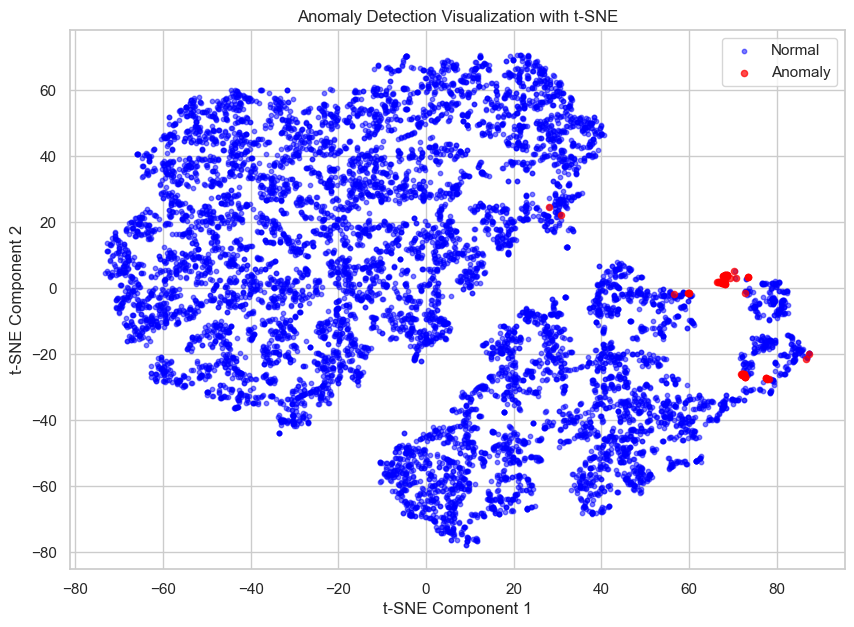

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE suele ser lento, tomaremos una muestra pequeña para acelerar
import numpy as np

sample_size = 10000  # ajusta según tu capacidad computacional
if len(X_scaled) > sample_size:
    idx = np.random.choice(len(X_scaled), sample_size, replace=False)
    X_sample = X_scaled[idx]
    anomaly_sample = anomaly_labels[idx]
else:
    X_sample = X_scaled
    anomaly_sample = anomaly_labels

tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1000)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(10, 7))
plt.scatter(
    X_tsne[anomaly_sample == 1, 0], X_tsne[anomaly_sample == 1, 1],
    c='blue', label='Normal', alpha=0.5, s=10
)
plt.scatter(
    X_tsne[anomaly_sample == -1, 0], X_tsne[anomaly_sample == -1, 1],
    c='red', label='Anomaly', alpha=0.7, s=20
)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Anomaly Detection Visualization with t-SNE')
plt.legend()
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Variables seleccionadas
features = [
    'Ore Pulp pH',
    'Starch Flow',
    'Amina Flow',
    'Flotation Column 01 Air Flow',
    '% Iron Feed',
    '% Silica Feed',
    'Ore Pulp Density'
]

target = '% Iron Concentrate'

# Reemplazar comas por puntos y convertir a float
for col in features + [target]:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.').astype(float)
    else:
        df[col] = df[col].astype(float)


# Eliminar filas con datos faltantes
df_model = df[features + [target]].dropna()

# Definir X e y
X = df_model[features]
y = df_model[target]

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0532
R^2 Score: 0.9574


In [21]:
from skopt import gp_minimize
from skopt.space import Real
import numpy as np

# Espacio de búsqueda según los valores reales en tu dataset
space = [
    Real(df['Ore Pulp pH'].min(), df['Ore Pulp pH'].max(), name='Ore Pulp pH'),
    Real(df['Starch Flow'].min(), df['Starch Flow'].max(), name='Starch Flow'),
    Real(df['Amina Flow'].min(), df['Amina Flow'].max(), name='Amina Flow'),
    Real(df['Flotation Column 01 Air Flow'].min(), df['Flotation Column 01 Air Flow'].max(), name='Air Flow'),
    Real(df['% Iron Feed'].min(), df['% Iron Feed'].max(), name='% Iron Feed'),
    Real(df['% Silica Feed'].min(), df['% Silica Feed'].max(), name='% Silica Feed'),
    Real(df['Ore Pulp Density'].min(), df['Ore Pulp Density'].max(), name='Pulp Density')
]

# Función objetivo: queremos maximizar la predicción del modelo
def objective(params):
    input_data = np.array([params])
    pred = model.predict(input_data)[0]
    return -pred  # Invertimos para maximizar

# Ejecutamos la optimización
result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=40,
    random_state=42,
    verbose=True
)

# Mostrar parámetros óptimos
best_params = result.x
max_predicted_iron = -result.fun

# Mostrar resultados
param_names = [dim.name for dim in space]
print("\n🔧 Optimal Input Parameters:")
for name, val in zip(param_names, best_params):
    print(f"{name}: {val:.4f}")

print(f"\n🎯 Maximum Predicted % Iron Concentrate: {max_predicted_iron:.4f}")


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0062
Function value obtained: -65.0551
Current minimum: -65.0551
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0041
Function value obtained: -65.3378
Current minimum: -65.3378
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0038
Function value obtained: -64.9160
Current minimum: -65.3378
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0039
Function value obtained: -64.9230
Current minimum: -65.3378
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0041
Function value obtained: -65.6276
Current minimum: -65.6276
Iteration No: 6

c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  

Iteration No: 10 ended. Evaluation done at random point.
Time taken: 0.1935
Function value obtained: -65.1396
Current minimum: -66.3947
Iteration No: 11 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 0.2177
Function value obtained: -64.4713
Current minimum: -66.3947
Iteration No: 12 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.3718
Function value obtained: -63.5441
Current minimum: -66.3947
Iteration No: 13 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.2499
Function value obtained: -66.1159
Current minimum: -66.3947
Iteration No: 14 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.2602
Function value obtained: -64.2311
Current minimum: -66.3947
Iteration No: 15 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.2164
Function value obtained: -65.0636
Current minimum: -66.3947
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.1875
Function value obtained: -65.9152
Current minimum: -66.3947
Iteration No: 17 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.2588
Function value obtained: -65.2144
Current minimum: -66.3947
Iteration No: 18 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.3422
Function value obtained: -66.3576
Current minimum: -66.3947
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.1588
Function value obtained: -66.0166
Current minimum: -66.3947
Iteration No: 20 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.2277
Function value obtained: -65.1089
Current minimum: -66.3947
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.1848
Function value obtained: -65.7538
Current minimum: -66.3947
Iteration No: 22 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.2578
Function value obtained: -64.4864
Current minimum: -66.3947
Iteration No: 23 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.2304
Function value obtained: -65.0564
Current minimum: -66.3947
Iteration No: 24 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.3171
Function value obtained: -64.8771
Current minimum: -66.3947
Iteration No: 25 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 0.2380
Function value obtained: -65.4907
Current minimum: -66.3947
Iteration No: 26 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.2428
Function value obtained: -64.5723
Current minimum: -66.3947
Iteration No: 27 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 0.2532
Function value obtained: -66.2289
Current minimum: -66.3947
Iteration No: 28 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.3563
Function value obtained: -64.7398
Current minimum: -66.3947
Iteration No: 29 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 0.3532
Function value obtained: -66.3350
Current minimum: -66.3947
Iteration No: 30 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 0.3577
Function value obtained: -66.4955
Current minimum: -66.4955
Iteration No: 31 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 0.4015
Function value obtained: -66.3432
Current minimum: -66.4955
Iteration No: 32 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.3660
Function value obtained: -66.0312
Current minimum: -66.4955
Iteration No: 33 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.4124
Function value obtained: -66.5193
Current minimum: -66.5193
Iteration No: 34 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.3889
Function value obtained: -66.3751
Current minimum: -66.5193
Iteration No: 35 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.4346
Function value obtained: -66.1627
Current minimum: -66.5193
Iteration No: 36 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.4198
Function value obtained: -65.4497
Current minimum: -66.5193
Iteration No: 37 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.4706
Function value obtained: -65.2964
Current minimum: -66.5193
Iteration No: 38 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.4463
Function value obtained: -66.1971
Current minimum: -66.5193
Iteration No: 39 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 0.3941
Function value obtained: -66.2963
Current minimum: -66.5193
Iteration No: 40 started. Searching for the next optimal point.


c:\Users\JG Fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 0.5004
Function value obtained: -65.4955
Current minimum: -66.5193

🔧 Optimal Input Parameters:
Ore Pulp pH: 10.5026
Starch Flow: 5036.0143
Amina Flow: 346.2429
Air Flow: 360.2321
% Iron Feed: 57.9799
% Silica Feed: 22.7644
Pulp Density: 1.7637

🎯 Maximum Predicted % Iron Concentrate: 66.5193
